## Optimize Booth function given by f(x,y)=-(y+47)np.sin(np.sqrt(np.abs(x/2+(y+47))))-x*np.sin(np.sqrt(np.abs(x-(y+47))))

In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%matplotlib notebook
plt.style.use('seaborn-white')
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('font',family='Times New Roman')
matplotlib.rcParams['font.size'] = 20

In [4]:
x=tf.Variable(0,dtype=tf.float32)
y=tf.Variable(0,dtype=tf.float32)

func=-(y+47)*tf.sin(tf.sqrt(tf.abs(x/2+(y+47))))-x*tf.sin(tf.sqrt(tf.abs(x-(y+47))))

#sq_err=(func-0)**2
#abs_err=np.abs(func)
#cost=tf.gradients(ys=func,xs=[x,y]) #Compute the derivative of cost

In [53]:
nsteps=100

err=func
costs=np.zeros(nsteps,float)
#train=tf.train.GradientDescentOptimizer(100).minimize(err)
train=tf.train.AdamOptimizer(200).minimize(err)
init = tf.global_variables_initializer() #MUST run this after choosing the optimizer so all values are initialized

with tf.Session() as session: #Using this form lets Python clean up if there is an exception
    session.run(init)
    for i in range(nsteps):
        costs[i]=np.asarray(session.run([train,err])[1])
    print (session.run([x,y,err]))


[-596.91943, 668.78143, -1309.5199]


<IPython.core.display.Javascript object>


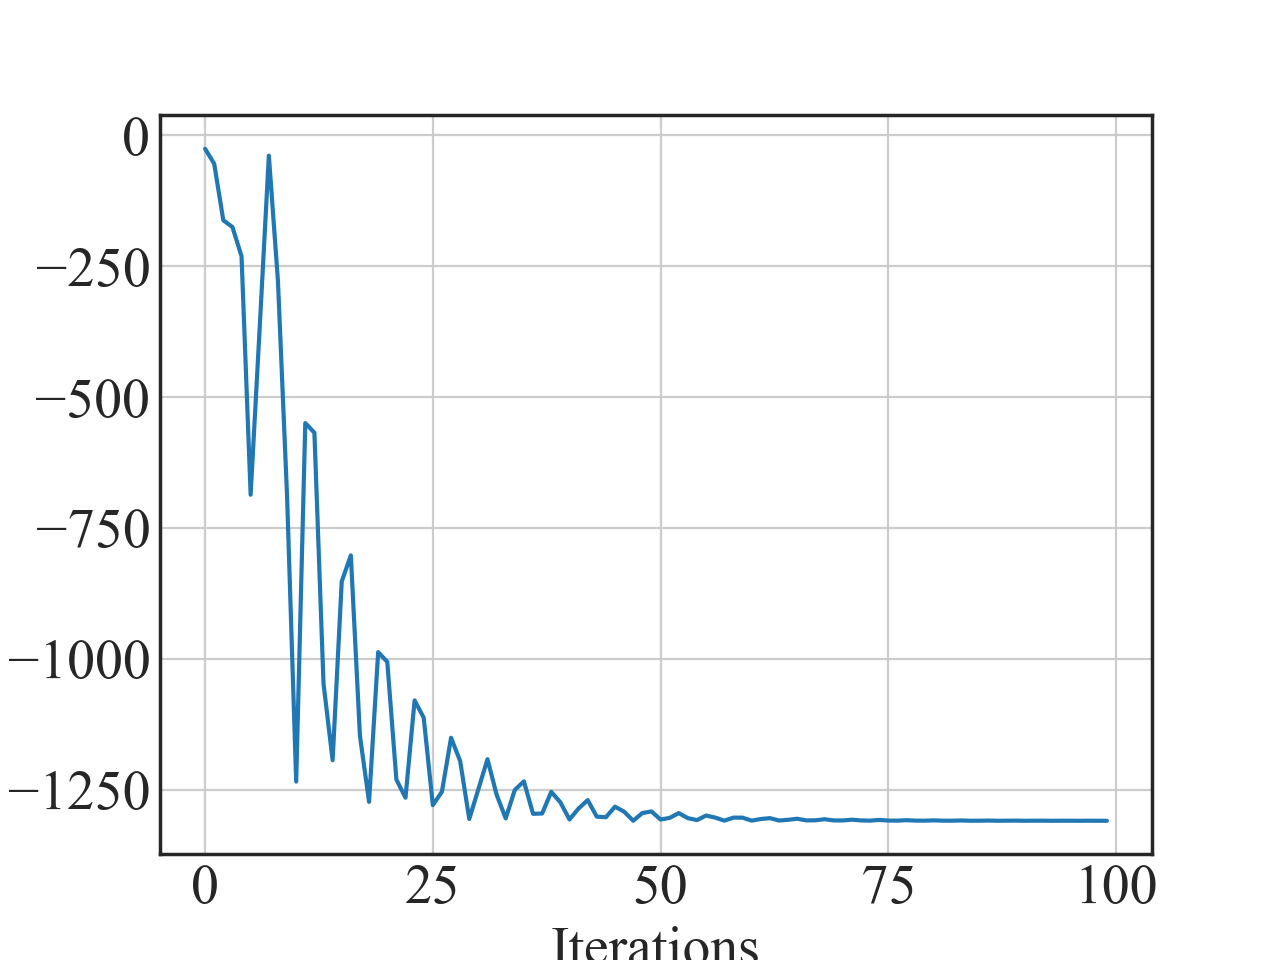

Text(0.5,0,'Iterations')

In [54]:
fig1,ax=plt.subplots(1,1)
ax.plot(costs)
plt.grid()
plt.ylabel('Error')
plt.xlabel('Iterations')

<IPython.core.display.Javascript object>


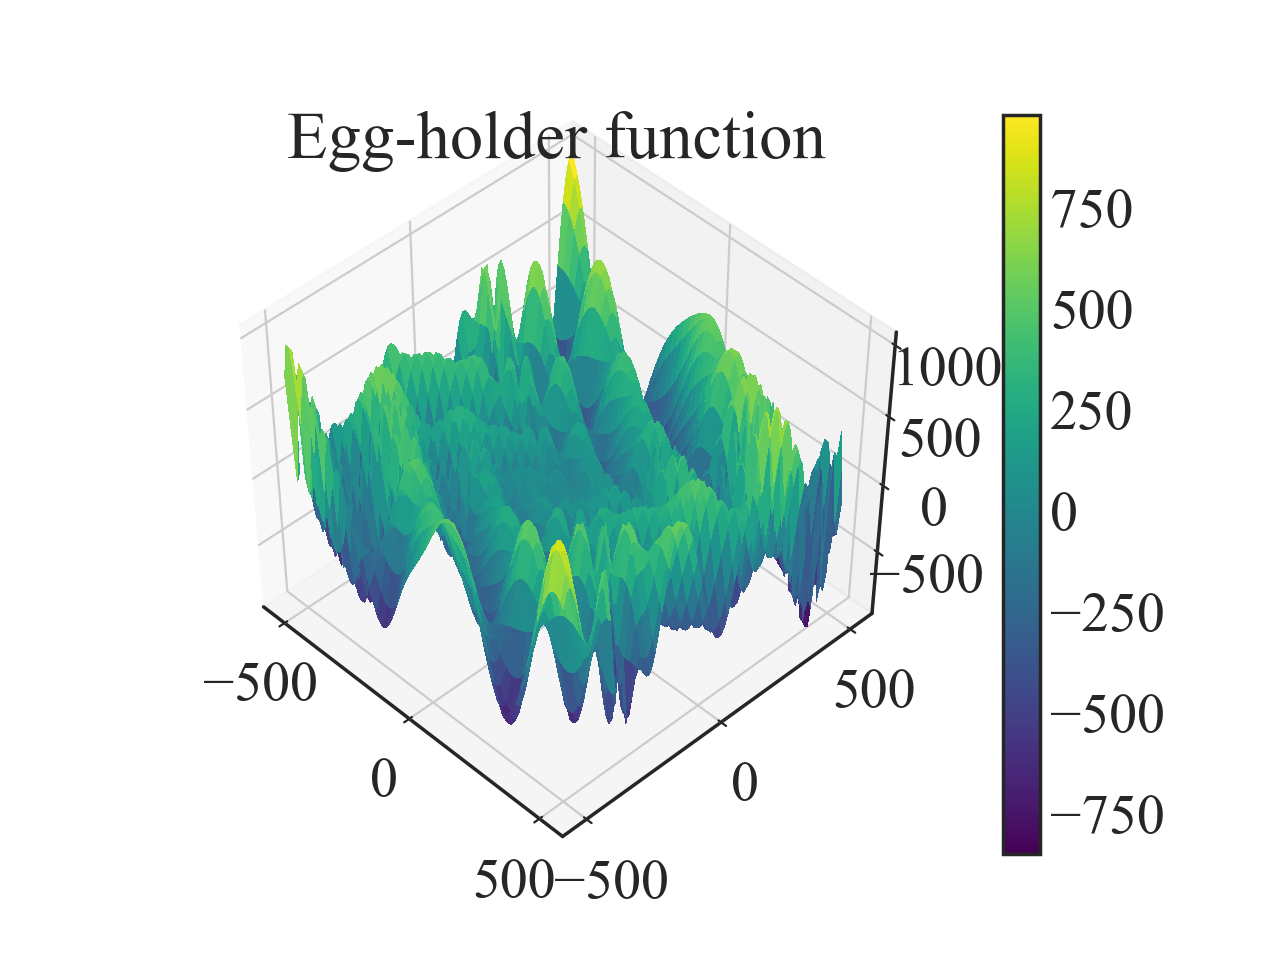

In [16]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm
x2=np.linspace(-512,512,100)
y2=np.linspace(-512,512,100)
X, Y = np.meshgrid(x2, y2)
def z(x,y):
    return -(y+47)*np.sin(np.sqrt(np.abs(x/2+(y+47))))-x*np.sin(np.sqrt(np.abs(x-(y+47))))

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, z(X,Y),linewidth=0, antialiased=False, cmap=cm.viridis)
ax.set_title("Egg-holder function")
plt.colorbar(surf)